<a href="https://colab.research.google.com/github/chardezel/Soccer-Analytics-Portfolio/blob/main/liverpool_24_25_potential_transfers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv("liverpool_transfers_2025.csv")
df.head()

,Player,Position,Age,Nationality,Transfer Type,Transfer Fee (£m),Goals,Assists
0,João Neves,CM,20,Portugal,In,55.0,2,3
1,Leny Yoro,CB,19,France,In,42.5,1,0
2,Mohammed Kudus,CAM,24,Ghana,In,48.0,7,6
3,Kostas Tsimikas,LB,28,Greece,Out,10.0,0,2
4,Fabio Carvalho,LW,22,Portugal,Out (Loan),0.0,0,1


In [ ]:
df.drop_duplicates(inplace=True)
df = df.dropna(subset=['Player', 'Position', 'Transfer Fee (£m)'])

df['Transfer Fee (£m)'] = df['Transfer Fee (£m)'].replace('[£m]', '', regex=True).astype(float)


Text(0.5, 1.0, 'Age Distribution of Signings')

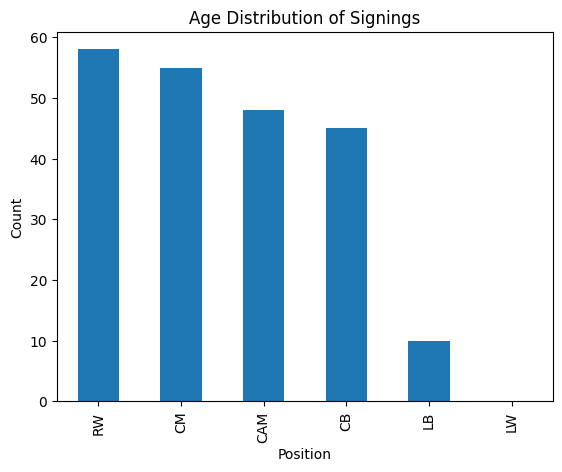

In [ ]:
df.groupby("Position")["Transfer Fee (£m)"].sum().sort_values(ascending=False).plot(kind='bar', title="Total Spending by Position")

sns.histplot(df["Age"], bins=10)
plt.title("Age Distribution of Signings")


<Axes: xlabel='Age', ylabel='Goals'>

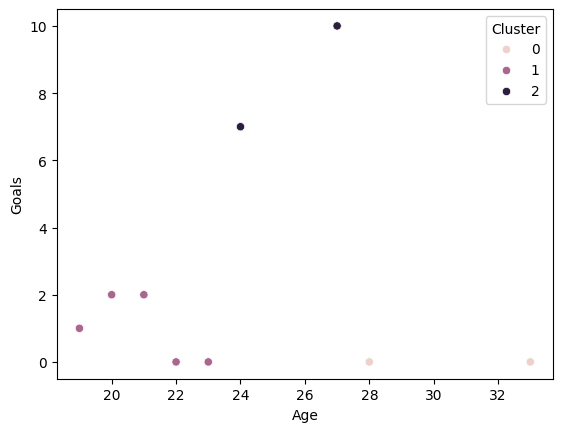

In [ ]:
features = df[['Goals', 'Assists', 'Age']].dropna()
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(features)

sns.scatterplot(data=df, x='Age', y='Goals', hue='Cluster')


In [ ]:
X = df[['Transfer Fee (£m)']]
y = df['Goals'] + df['Assists']
model = LinearRegression().fit(X, y)

print("R^2 Score:", model.score(X, y))


R^2 Score: 0.5214721133851831
